In [1]:
import cantools
import random
import struct
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
import time

In [2]:
from flask_socketio import SocketIO, emit

In [59]:
import random
import struct

def generate_raw_can_data():
    # Generate raw data for MotorController1 (ID: 0x1810A7F3)
    motor_speed = int(random.uniform(0, 10000) / 0.1)  # MotorSpeed: 0|16@1+ (0.1,0)
    motor_speed = max(0, min(motor_speed, 65535))
    
    motor_torque = int(random.uniform(0, 500) / 0.1)  # MotorTorque: 16|16@1+ (0.1,0)
    motor_torque = max(0, min(motor_torque, 65535))
    
    motor_temperature = int(random.uniform(-40, 210))  # MotorTemperature: 32|16@1+ (1,0)
    motor_temperature = max(0, min(motor_temperature, 65535))
    
    motor_controller1_data = struct.pack('<HHHxx', motor_speed, motor_torque, motor_temperature)

    # Generate raw data for MotorController2 (ID: 0x1818A7F3)
    motor_speed2 = int(random.uniform(0, 10000) / 0.1)  # MotorSpeed2: 0|16@1+ (0.1,0)
    motor_speed2 = max(0, min(motor_speed2, 65535))
    
    motor_torque2 = int(random.uniform(0, 500) / 0.1)  # MotorTorque2: 16|16@1+ (0.1,0)
    motor_torque2 = max(0, min(motor_torque2, 65535))
    
    inverter_temperature = int(random.uniform(-40, 210))  # InverterTemperature: 32|16@1+ (1,0)
    inverter_temperature = max(0, min(inverter_temperature, 65535))
    
    motor_controller2_data = struct.pack('<HHHxx', motor_speed2, motor_torque2, inverter_temperature)

    # Generate raw data for BatteryManagement1 (ID: 0x1801F3A7)
    battery_voltage = int(random.uniform(0, 6553.5) / 0.1)  # BatteryVoltage: 0|16@1+ (0.1,0)
    battery_voltage = max(0, min(battery_voltage, 65535))
    
    battery_current = int(random.uniform(-3276.8, 3276.7) / 0.1)  # BatteryCurrent: 16|16@1+ (0.1,0)
    battery_current = max(-32768, min(battery_current, 32767))
    
    state_of_charge = int(random.uniform(0, 100) / 0.4)  # StateOfCharge: 32|8@1+ (0.4,0)
    state_of_charge = max(0, min(state_of_charge, 255))
    
    battery_temperature = int(random.uniform(-40, 100))  # BatteryTemperature: 40|16@1+ (1,0)
    battery_temperature = max(0, min(battery_temperature, 65535))
    
    battery_management1_data = struct.pack('<HhBHxx', battery_voltage, battery_current, state_of_charge, battery_temperature)

    # Generate raw data for VehicleStatus1 (ID: 0x18500627)
    vehicle_speed = int(random.uniform(0, 250.996) / 0.00390625)  # VehicleSpeed: 8|16@1+ (0.00390625,0)
    vehicle_speed = max(0, min(vehicle_speed, 65535))
    
    odometer = int(random.uniform(0, 4294967295))  # Odometer: 24|32@1+ (1,0)
    tire_pressure_fl = int(random.uniform(0, 100) / 0.1)  # TirePressureFL: 0|8@1+ (0.1,0)
    tire_pressure_fl = max(0, min(tire_pressure_fl, 255))  # Ensure the value is between 0 and 255
    
    tire_pressure_fr = int(random.uniform(0, 100) / 0.1)  # TirePressureFR: 8|8@1+ (0.1,0)
    tire_pressure_fr = max(0, min(tire_pressure_fr, 255))  # Ensure the value is between 0 and 255
    
    vehicle_status1_data = struct.pack('<BHHIB', tire_pressure_fl, tire_pressure_fr, vehicle_speed, odometer, 0x00)

    # Generate raw data for BatteryManagement2 (ID: 0x18FF0527)
    battery_voltage2 = int(random.uniform(0, 6553.5) / 0.1)  # BatteryVoltage2: 0|16@1+ (0.1,0)
    battery_voltage2 = max(0, min(battery_voltage2, 65535))
    
    battery_current2 = int(random.uniform(-3276.8, 3276.7) / 0.1)  # BatteryCurrent2: 16|16@1+ (0.1,0)
    battery_current2 = max(-32768, min(battery_current2, 32767))
    
    battery_management2_data = struct.pack('<Hhxxxx', battery_voltage2, battery_current2)

    # Generate raw data for BatteryManagement3 (ID: 0x18FF0927)
    state_of_charge2 = int(random.uniform(0, 100) / 0.4)  # StateOfCharge2: 32|8@1+ (0.4,0)
    state_of_charge2 = max(0, min(state_of_charge2, 255))
    
    battery_temperature2 = int(random.uniform(-40, 100))  # BatteryTemperature2: 40|16@1+ (1,0)
    battery_temperature2 = max(0, min(battery_temperature2, 65535))
    
    battery_management3_data = struct.pack('<BHHxxx', state_of_charge2, battery_temperature2, 0x00)

    # Prepare CAN data dictionary
    can_data = {
        '1810A7F3': motor_controller1_data,
        '1818A7F3': motor_controller2_data,
        '1801F3A7': battery_management1_data,
        '18500627': vehicle_status1_data,
        '18FF0527': battery_management2_data,
        '18FF0927': battery_management3_data,
    }

    # Format the output as messageID#message
    formatted_can_data = {}
    for can_id, data in can_data.items():
        # Convert byte data to hex string and format as 'messageID#message'
        formatted_message = ''.join(['{:02X}'.format(b) for b in data])
        formatted_can_data[can_id] = f'{can_id}#{formatted_message}'
        

    ##Print the formatted CAN data
    ##print("Generated CAN data (messageID#message):")
    #for can_id, message in formatted_can_data.items():
    #    print(message)
    return formatted_can_data
    


The bit assignments are:

StateOfCharge2: Now starts at bit 0, with a length of 8 bits (occupying the first byte).
BatteryTemperature2: Now starts at bit 8, with a length of 16 bits (occupying the second and third bytes).
Since both fields start consecutively (0 to 8 bits for StateOfCharge2, 8 to 24 bits for BatteryTemperature2), you no longer need padding between these two fields. The struct.pack call should reflect this change.

<: Little-endian byte order.
B: 1 byte for state_of_charge2 (8 bits).
H: 2 bytes for battery_temperature2 (16 bits).
xxxx: 4 bytes of padding to reach a total length of 8 bytes.
The total size will now be 8 bytes, where:

The first byte represents the StateOfCharge2 value.
The second and third bytes represent the BatteryTemperature2 value.
The last 4 bytes are padding to make up the rest of the 8-byte CAN message.

In [19]:
''' 
# List of DBC IDs
dbc_ids = [
    2551228403, 2551228403, 2566877313, 2566877313, 2566877313, 2566878081,
    2566878081, 2566880129, 2566878593, 2551752691, 2551031795, 2551031795,
    2551031795, 2551031795, 2552539123, 2552539123, 2552539123, 2550900723,
    2550900723, 2550900723, 2550966259, 2550966259, 2550966259
]
 
# Apply the mask to each DBC ID and store the results
can_ids = [(dbc_id, dbc_id & mask) for dbc_id in dbc_ids]
 
# Creating a table with the results
import pandas as pd
df = pd.DataFrame(can_ids, columns=["DBC ID", "29-bit CAN ID"])
df
'''

' \n# List of DBC IDs\ndbc_ids = [\n    2551228403, 2551228403, 2566877313, 2566877313, 2566877313, 2566878081,\n    2566878081, 2566880129, 2566878593, 2551752691, 2551031795, 2551031795,\n    2551031795, 2551031795, 2552539123, 2552539123, 2552539123, 2550900723,\n    2550900723, 2550900723, 2550966259, 2550966259, 2550966259\n]\n \n# Apply the mask to each DBC ID and store the results\ncan_ids = [(dbc_id, dbc_id & mask) for dbc_id in dbc_ids]\n \n# Creating a table with the results\nimport pandas as pd\ndf = pd.DataFrame(can_ids, columns=["DBC ID", "29-bit CAN ID"])\ndf\n'

In [60]:
# Example call to generate the data
generate_raw_can_data()

{'1810A7F3': '1810A7F3#FFFFA60600000000',
 '1818A7F3': '1818A7F3#0E9E930963000000',
 '1801F3A7': '1801F3A7#E8F723E67F47000000',
 '18500627': '18500627#FFFF009557CFEA085E00',
 '18FF0527': '18FF0527#9CE0493C00000000',
 '18FF0927': '18FF0927#2757000000000000'}

In [61]:
# Load the DBC file
dbc_file = 'demo3.dbc'
db = cantools.database.load_file('demo3.dbc')

In [8]:
db.get_message_by_name('VehicleStatus1')

message('VehicleStatus1', 0x18500627, True, 8, {None: 'Vehicle Status 1 Data'})

In [10]:
db.get_message_by_frame_id(0x18500627)

message('VehicleStatus1', 0x18500627, True, 8, {None: 'Vehicle Status 1 Data'})

In [11]:
for message in db.messages :
    print(message.frame_id)

403744755
404269043
402781095
407897639
419366183
419367207
419365671
402958323
403023859
403089395


In [92]:
import cantools
import binascii

def decode_can_data(can_id, raw_data, db):
    """
    Decodes the CAN message using the DBC file based on CAN ID and raw hex data.
    
    Args:
        can_id (str): CAN message identifier (CAN ID) in hex format (e.g. '1810A7F3').
        raw_data (str): Raw CAN data in hex string format (e.g. 'B50C6310B8000000').
        db (cantools.database.Database): Loaded DBC database.

    Returns:
        dict: A dictionary with signal names and their decoded values, or an error message if decoding fails.
    """
    try:
        # Convert the CAN ID from hex string to an integer
        can_id_int = int(can_id, 16)
        #print('can id: ',can_id_int)
        # Convert raw hex string data into bytes
        data_bytes = binascii.unhexlify(raw_data)
        
        # Look for the message by CAN ID in the DBC file
        dbc_message = None
        for message in db.messages:
            # Get the 29-bit frame ID
            #print("message_id(32 Bit) :", message)
            message_29bit_id = message.frame_id & 0x1FFFFFFF
            #print('message id(29 bit) : ',message_29bit_id)
            if message_29bit_id == can_id_int:
                dbc_message = message
                break
        
        if dbc_message:
            # Decode the CAN data using the DBC message definition
            decoded_signals = dbc_message.decode(data_bytes)
            
            # Return the decoded signal values as a dictionary
            return decoded_signals
        else:
            print(f"Message for CAN ID {can_id} not found in DBC.")
            return None
    except Exception as e:
        print(f"Error decoding CAN data: {e}")
        return None




In [68]:
# Decode a CAN message
can_id = '1810A7F3'  # Example CAN ID in hex format
raw_data = 'B2841C002C000000'#'B50C6310B8000000'  # Example CAN data in hex format
decoded_signals = decode_can_data(can_id, raw_data, db)

can id:  403744755


In [69]:
# Print the decoded signals
if decoded_signals:
    for signal_name, signal_value in decoded_signals.items():
        print(f"Signal: {signal_name}, Value: {signal_value}")


Signal: MotorSpeed, Value: 3397.0
Signal: MotorTorque, Value: 2.8000000000000003
Signal: MotorTemperature, Value: 44


In [70]:
db.messages

[message('MotorController1', 0x1810a7f3, True, 8, {None: 'Motor Controller 1 Data'}),
 message('MotorController2', 0x1818a7f3, True, 8, {None: 'Motor Controller 2 Data'}),
 message('BatteryManagement1', 0x1801f3a7, True, 8, {None: 'Battery Management 1 Data'}),
 message('VehicleStatus1', 0x18500627, True, 8, {None: 'Vehicle Status 1 Data'}),
 message('BatteryManagement2', 0x18ff0527, True, 8, None),
 message('BatteryManagement3', 0x18ff0927, True, 8, None),
 message('MotorController3', 0x18ff0327, True, 8, None),
 message('MotorController4', 0x1804a7f3, True, 8, None),
 message('InverterController1', 0x1805a7f3, True, 8, None),
 message('InverterController2', 0x1806a7f3, True, 8, None)]

In [19]:
{'1810A7F3': '1810A7F3#B2841C002C000000',
 '1818A7F3': '1818A7F3#FFFFC20892000000',
 '1801F3A7': '1801F3A7#311DF083362C000000',
 '18500627': '18500627#FF4C00B60360F60D9100',
 '18FF0527': '18FF0527#D81C671300000000',
 '18FF0927': '18FF0927#1D420000000000'}

{'1810A7F3': '1810A7F3#B2841C002C000000',
 '1818A7F3': '1818A7F3#FFFFC20892000000',
 '1801F3A7': '1801F3A7#311DF083362C000000',
 '18500627': '18500627#FF4C00B60360F60D9100',
 '18FF0527': '18FF0527#D81C671300000000',
 '18FF0927': '18FF0927#1D420000000000'}

In [71]:
# Decode a CAN message
can_id = '1818A7F3'  # Example CAN ID in hex format
raw_data = 'FFFFC20892000000'  # Example CAN data in hex format
decoded_signals = decode_can_data(can_id, raw_data, db)
# Print the decoded signals
if decoded_signals:
    for signal_name, signal_value in decoded_signals.items():
        print(f"Signal: {signal_name}, Value: {signal_value}")

can id:  404269043
Signal: MotorSpeed2, Value: 6553.5
Signal: MotorTorque2, Value: 224.20000000000002
Signal: InverterTemperature, Value: 146


In [72]:
# Decode a CAN message
can_id = '1801F3A7'  # Example CAN ID in hex format
raw_data = '311DF083362C000000'  # Example CAN data in hex format
decoded_signals = decode_can_data(can_id, raw_data, db)
# Print the decoded signals
if decoded_signals:
    for signal_name, signal_value in decoded_signals.items():
        print(f"Signal: {signal_name}, Value: {signal_value}")

can id:  402781095
Signal: BatteryVoltage, Value: 747.3000000000001
Signal: BatteryCurrent, Value: 3377.6000000000004
Signal: StateOfCharge, Value: 21.6
Signal: BatteryTemperature, Value: 44


In [73]:
# Decode a CAN message
can_id = '18500627'  # Example CAN ID in hex format
raw_data = 'FF4C00B60360F60D9100'  # Example CAN data in hex format
decoded_signals = decode_can_data(can_id, raw_data, db)
# Print the decoded signals
if decoded_signals:
    for signal_name, signal_value in decoded_signals.items():
        print(f"Signal: {signal_name}, Value: {signal_value}")

can id:  407897639
Signal: TirePressureFL, Value: 25.5
Signal: TirePressureFR, Value: 7.6000000000000005
Signal: VehicleSpeed, Value: 182.0
Signal: Odometer, Value: 234250243


In [74]:
# Decode a CAN message
can_id = '18FF0527'  # Example CAN ID in hex format
raw_data = 'D81C671300000000'  # Example CAN data in hex format
decoded_signals = decode_can_data(can_id, raw_data, db)
# Print the decoded signals
if decoded_signals:
    for signal_name, signal_value in decoded_signals.items():
        print(f"Signal: {signal_name}, Value: {signal_value}")

can id:  419366183
Signal: BatteryVoltage2, Value: 738.4000000000001
Signal: BatteryCurrent2, Value: 496.70000000000005


In [77]:
# Decode a CAN message '18FF0927#AD0000000000'
can_id = '18FF0927'  # Example CAN ID in hex format
raw_data = '2757000000000000'  # Example CAN data in hex format
decoded_signals = decode_can_data(can_id, raw_data, db)
# Print the decoded signals
if decoded_signals:
    for signal_name, signal_value in decoded_signals.items():
        print(f"Signal: {signal_name}, Value: {signal_value}")

can id:  419367207
Signal: StateOfCharge2, Value: 0.0
Signal: BatteryTemperature2, Value: 0


In [ ]:
decoded_signals

In [79]:
can_data

{'1810A7F3': '1810A7F3#DF0A7B066F000000',
 '1818A7F3': '1818A7F3#FFFFC61205000000',
 '1801F3A7': '1801F3A7#E79CDB7FB74C000000',
 '18500627': '18500627#29FF001243BD3B894100',
 '18FF0527': '18FF0527#D5B7EBD300000000',
 '18FF0927': '18FF0927#2900000000000000'}

In [84]:
can_data.items()

dict_items([('1810A7F3', '1810A7F3#DF0A7B066F000000'), ('1818A7F3', '1818A7F3#FFFFC61205000000'), ('1801F3A7', '1801F3A7#E79CDB7FB74C000000'), ('18500627', '18500627#29FF001243BD3B894100'), ('18FF0527', '18FF0527#D5B7EBD300000000'), ('18FF0927', '18FF0927#2900000000000000')])

In [93]:
for can_id, data in can_data.items():
        try:
            can_id, data = data.split('#')  # Split CAN ID and Data payload
            decoded_data[can_id] = decode_can_data(can_id, data, db)
        except Exception as e:
            print(f"Error decoding CAN ID {can_id}: {e}")
            continue

c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ag928515.ttl\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

KeyboardInterrupt: 

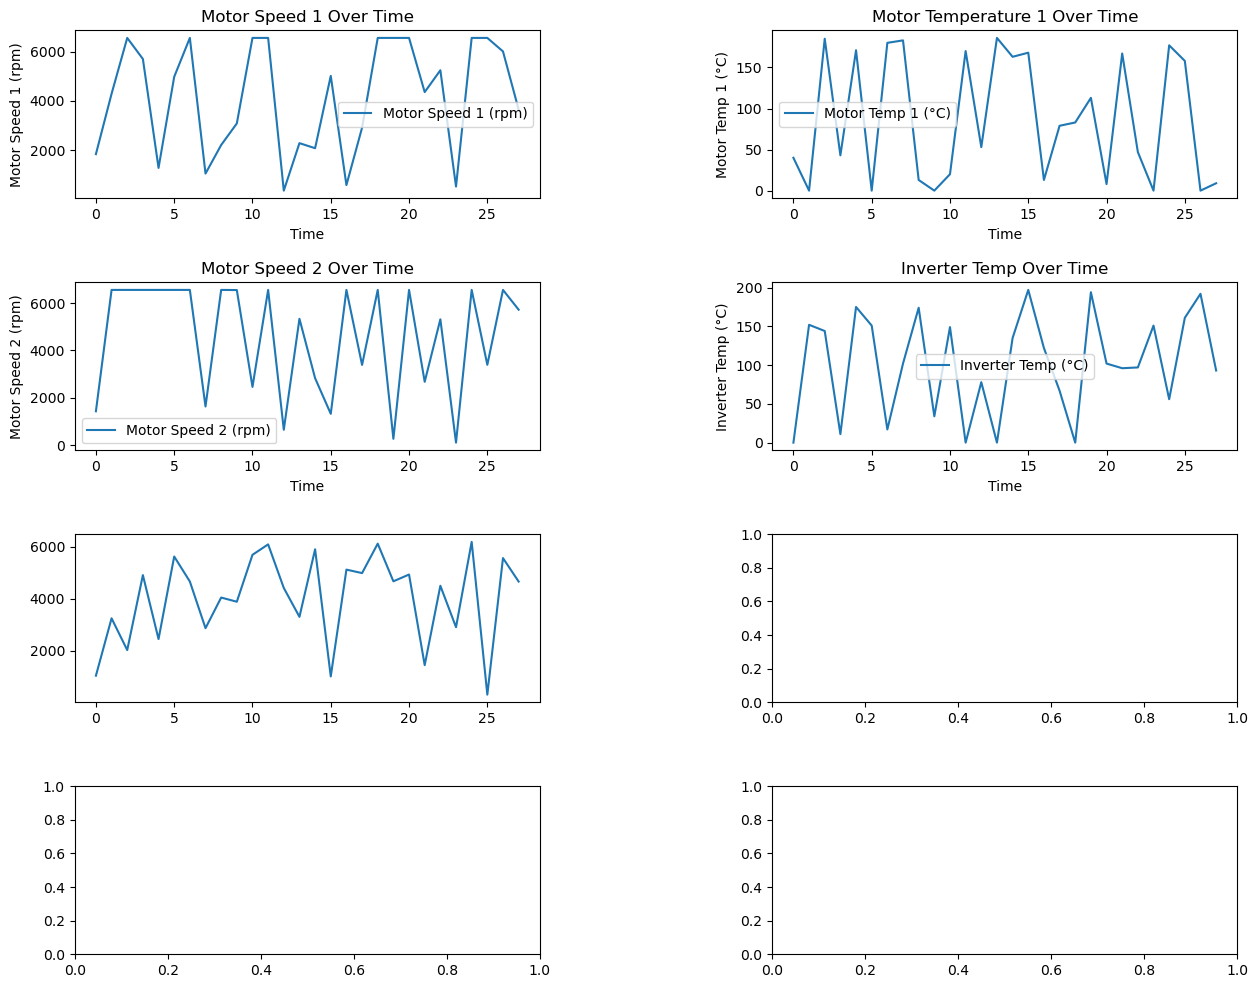

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, clear_output

# Initialize data lists to store real-time values
motor_speed_1 = []
motor_temp_1 = []
motor_torque_1 = []
motor_speed_2 = []
motor_temp_2 = []
motor_torque_2 = []
battery_voltage_1 = []
battery_current_1 = []
soc_1 = []
battery_voltage_2 = []
battery_current_2 = []
soc_2 = []
battery_voltage_3 = []
battery_current_3 = []
soc_3 = []
vehicle_speed = []
odometer = []
battery_temperature_1= []
battery_temperature_2 = []
tire_pressure_FL =[]
tire_pressure_FR =[]

if __name__ == "__main__":
    plt.ion()  # Turn on interactive mode
    fig, axs = plt.subplots(4, 2, figsize=(15, 12))  # Added one more row for new data
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    while True:
        can_data = generate_raw_can_data()  # Simulated or real-time data
        decoded_data = {}
        
        # Process CAN data
        for can_id, raw_data in can_data.items():
            try:
                can_id, data = raw_data.split('#')  # Split CAN ID and Data payload
                decoded_data[can_id] = decode_can_data(can_id, data, db)
            except Exception as e:
                print(f"Error decoding CAN ID {can_id}: {e}")
                continue

        # Clear previous plots
        for ax in axs.flatten():
            ax.clear()

        # Process and append data from MotorController1 (ID: 2551228403 or '1810A7F3')
        if '1810A7F3' in decoded_data:
            motor_speed_1.append(decoded_data['1810A7F3']['MotorSpeed'])
            motor_temp_1.append(decoded_data['1810A7F3']['MotorTemperature'])
            motor_torque_1.append(decoded_data['1810A7F3']['MotorTorque'])
            #print(f"MotorSpeed1: {motor_speed_1[-1]} rpm, MotorTemp1: {motor_temp_1[-1]} °C, MotorTorque1: {motor_torque_1[-1]} Nm")

        # Process and append data from MotorController2 (ID: 2551752691 or '1818A7F3')
        if '1818A7F3' in decoded_data:
            motor_speed_2.append(decoded_data['1818A7F3']['MotorSpeed2'])
            motor_temp_2.append(decoded_data['1818A7F3']['InverterTemperature'])
            motor_torque_2.append(decoded_data['1818A7F3']['MotorTorque2'])
            #print(f"MotorSpeed2: {motor_speed_2[-1]} rpm, InverterTemp: {motor_temp_2[-1]} °C, MotorTorque2: {motor_torque_2[-1]} Nm")

        # Process and append data from BatteryManagement1 (ID: 2550264743 or '1801F3A7')
        if '1801F3A7' in decoded_data:
            battery_voltage_1.append(decoded_data['1801F3A7']['BatteryVoltage'])
            battery_current_1.append(decoded_data['1801F3A7']['BatteryCurrent'])
            soc_1.append(decoded_data['1801F3A7']['StateOfCharge'])
            battery_temperature_1.append(decoded_data['1801F3A7']['BatteryTemperature'])

        # Process and append data from BatteryManagement2 (ID: 2566849831 or '18FF0527')
        if '18FF0527' in decoded_data:
            battery_voltage_2.append(decoded_data['18FF0527']['BatteryVoltage2'])
            battery_current_2.append(decoded_data['18FF0527']['BatteryCurrent2'])

        # Process and append data from BatteryManagement3 (ID: 2566850855 or '18FF0927')
        if '18FF0927' in decoded_data:
            soc_2.append(decoded_data['18FF0927']['StateOfCharge2'])  # Assuming same signals as BM2
            battery_temperature_2.append(decoded_data['18FF0927']['BatteryTemperature2'])
        

        # Process and append data from VehicleStatus1 (ID: 2555381287 or '18500627')
        if '18500627' in decoded_data:
            vehicle_speed.append(decoded_data['18500627']['VehicleSpeed'])
            odometer.append(decoded_data['18500627']['Odometer'])
            tire_pressure_FL.append(decoded_data['18500627']['TirePressureFL'])
            tire_pressure_FR.append(decoded_data['18500627']['TirePressureFR'])

        # Keep only the last 100 data points for real-time plotting
        motor_speed_1 = motor_speed_1[-100:]
        motor_temp_1 = motor_temp_1[-100:]
        motor_torque_1 = motor_torque_1[-100:]
        motor_speed_2 = motor_speed_2[-100:]
        motor_temp_2 = motor_temp_2[-100:]
        motor_torque_2 = motor_torque_2[-100:]
        battery_voltage_1 = battery_voltage_1[-100:]
        battery_current_1 = battery_current_1[-100:]
        soc_1 = soc_1[-100:]
        battery_voltage_2 = battery_voltage_2[-100:]
        battery_current_2 = battery_current_2[-100:]
        soc_2 = soc_2[-100:]
        battery_voltage_3 = battery_voltage_3[-100:]
        battery_current_3 = battery_current_3[-100:]
        soc_3 = soc_3[-100:]
        vehicle_speed = vehicle_speed[-100:]
        odometer = odometer[-100:]
        
        # Plot MotorController1 data
        sns.lineplot(ax=axs[0, 0], x=range(len(motor_speed_1)), y=motor_speed_1, label='Motor Speed 1 (rpm)')
        axs[0, 0].set_title('Motor Speed 1 Over Time')
        axs[0, 0].set_xlabel('Time')
        axs[0, 0].set_ylabel('Motor Speed 1 (rpm)')

        sns.lineplot(ax=axs[0, 1], x=range(len(motor_temp_1)), y=motor_temp_1, label='Motor Temp 1 (°C)')
        axs[0, 1].set_title('Motor Temperature 1 Over Time')
        axs[0, 1].set_xlabel('Time')
        axs[0, 1].set_ylabel('Motor Temp 1 (°C)')

        # Plot MotorController2 data
        sns.lineplot(ax=axs[1, 0], x=range(len(motor_speed_2)), y=motor_speed_2, label='Motor Speed 2 (rpm)')
        axs[1, 0].set_title('Motor Speed 2 Over Time')
        axs[1, 0].set_xlabel('Time')
        axs[1, 0].set_ylabel('Motor Speed 2 (rpm)')

        sns.lineplot(ax=axs[1, 1], x=range(len(motor_temp_2)), y=motor_temp_2, label='Inverter Temp (°C)')
        axs[1, 1].set_title('Inverter Temp Over Time')
        axs[1, 1].set_xlabel('Time')
        axs[1, 1].set_ylabel('Inverter Temp (°C)')

        # Plot BatteryManagement1 data
        sns.lineplot(ax=axs[2, 0], x=range(len(battery_voltage_1)), y=battery_voltage_1, label='Battery Voltage 1 (V)')
        axs[2, 0].set_title('Battery Voltage 1 Over Time')
        axs[2, 0].set_xlabel('Time')
        axs[2, 0].set_ylabel('Battery Voltage 1 (V)')

        sns.lineplot(ax=axs[2, 1], x=range(len(battery_current_1)), y=battery_current_1, label='Battery Current 1 (A)')
        axs[2, 1].set_title('Battery Current 1 Over Time')
        axs[2, 1].set_xlabel('Time')
        axs[2, 1].set_ylabel('Battery Current 1 (A)')

        # Plot Vehicle Speed data
        sns.lineplot(ax=axs[3, 0], x=range(len(vehicle_speed)), y=vehicle_speed, label='Vehicle Speed (km/h)')
        axs[3, 0].set_title('Vehicle Speed Over Time')
        axs[3, 0].set_xlabel('Time')
        axs[3, 0].set_ylabel('Vehicle Speed (km/h)')

        sns.lineplot(ax=axs[3, 1], x=range(len(odometer)), y=odometer, label='Odometer (km)')
        axs[3, 1].set_title('Odometer Over Time')
        axs[3, 1].set_xlabel('Time')
        axs[3, 1].set_ylabel('Odometer (km)')

        # Display plots
        display(fig)
        clear_output(wait=True)
        time.sleep(1)  # Update every second
